In [2]:
# 単純なグリッドサーチの実装

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

print(f"Size of training set: {X_train.shape[0]} Size of test set: {X_test.shape[0]}")

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # それぞれのパラメータの組み合わせに対してSVCを訓練
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # SVCをテストセットで評価
        score = svm.score(X_test, y_test)
        # 良いスコアだったらスコアとパラメータを保存
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print(f"Best score: {best_score}")
print(f"Best parameters: {best_parameters}")

Size of training set: 112 Size of test set: 38
Best score: 0.9736842105263158
Best parameters: {'C': 100, 'gamma': 0.001}


In [3]:
import mglearn
import numpy as np
from matplotlib import pyplot as plt
# データセットを
# 訓練セットと、検証セット(パラメータ選択のため)と、テストセットの3つに分割する
mglearn.plots.plot_threefold_split()

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# データを訓練+検証セットとテストセットにわける
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# 訓練+検証セットを訓練セットと検証セットに分割する
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print(f"Size of training set: {X_train.shape[0]} size of validation set: {X_valid.shape[0]} size of test set: {X_test.shape[0]}")

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # それぞれのパラメータの組み合わせに対してSVCを訓練
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # SVCを検証セットで評価
        score = svm.score(X_valid, y_valid)
        # 良いスコアだったらスコアとパラメータを保存
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 訓練セットと検証セットも用いてモデルを構築し
# テストセットで評価
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
 
# 新しいデータに対する精度
print(f"Best score: {best_score}")
print(f"Best parameters: {best_parameters}")
print(f"Test set score with best parameters: {test_score}")

Size of training set: 84 size of validation set: 28 size of test set: 38
Best score: 0.9642857142857143
Best parameters: {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.9210526315789473


/Users/takaaki-suzuki/.pyenv/versions/3.6.5/envs/sklearn-test/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/takaaki-suzuki/.pyenv/versions/3.6.5/envs/sklearn-test/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/takaaki-suzuki/.pyenv/versions/3.6.5/envs/sklearn-test/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training 

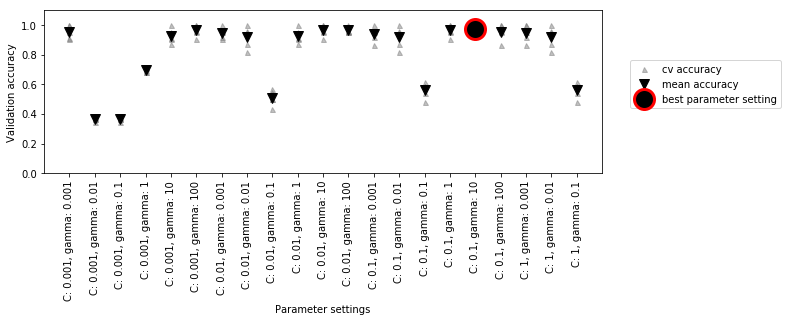

In [5]:
# 交差検証を用いたグリッドサーチ
from sklearn.model_selection import  cross_val_score
from matplotlib import pyplot as plt

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # それぞれのパラメータの組み合わせに対して
        # SVCを訓練する
        svm = SVC(gamma=gamma, C=C)
        # 交差検証を行う
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 交差検証精度の平均値を計算する
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma': gamma}
# 訓練セットと検証セットをあわせて、モデルを再構築する
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

# 交差検証を用いたグリッドサーチをまとめて交差検証ということが多い
mglearn.plots.plot_cross_val_selection()

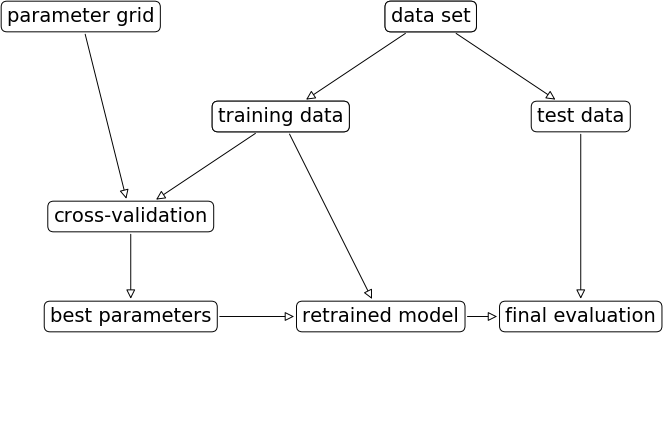

In [6]:
mglearn.plots.plot_grid_search_overview()

In [7]:
# 交差検証を用いたグリッドサーチは、一般的にパラメータチューニングに使われる。
# GridSearchCVを使う
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10 , 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print(param_grid)

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

# GridSearchCVのfitを呼ぶと,最適なパラメータ設定をサーチするだけではなく、交差検証で最も良いスコアだったパラメータを用いて
# 自動的に訓練セット全体に対して新しいモデルを学習してくれる

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [9]:
print(f"Test set score: {grid_search.score(X_test, y_test)}")

Test set score: 0.9736842105263158


In [10]:
# ここで評価されている汎化性能にも注意する
# socreメソッドの結果は、訓練セット全体を用いて訓練したモデルを用いた結果である
# これに対して、best_score_に格納されている値は 訓練セットに対する交差検証の平均交差検証精度になる
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.9732142857142857


In [11]:
print(f"Best estimator: {grid_search.best_estimator_}")

Best estimator: SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [12]:
# 交差検証結果の解析
import pandas as pd
# Dataframeへ変換
results = pd.DataFrame(grid_search.cv_results_)

results.head(5)

/Users/takaaki-suzuki/.pyenv/versions/3.6.5/envs/sklearn-test/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/takaaki-suzuki/.pyenv/versions/3.6.5/envs/sklearn-test/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/takaaki-suzuki/.pyenv/versions/3.6.5/envs/sklearn-test/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000734,0.000140,0.000284,0.000013,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.000813,0.000134,0.000394,0.000079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.001285,0.000653,0.000983,0.000952,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.000601,0.000036,0.000257,0.000036,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.000877,0.000139,0.000530,0.000237,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


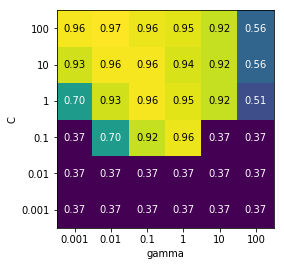

In [13]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# 平均交差検証スコアのプロット
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

In [14]:
# ネストした交差検証
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)

print(f"Cross-validatino scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validatino scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean cross-validation score: 0.9800000000000001


In [25]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_score = []
    # 外側の交差検証による個々の分割に対するループ
    # splitメソッドはインデックスを返す
    for training_samples, test_samples in outer_cv.split(X, y):
        # 内側の交差検証を用いて最良のパラメータ設定を見つける
        best_params = {}
        best_scores = -np.inf
        # 個々のパラメータ設定に対してループ
        for parameters in parameter_grid:
            # 内側の交差検証のループ
            cv_scores = []
            # 内側の交差検証のループ
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                # 与えられたパラメータと訓練セットでクラス分類器を訓練
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 内側の分割に対するスコアの平均を算出
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 内部の分割に対するスコア平均を算出
            mean_score = np.mean(cv_scores)
            if mean_score > best_scores:
                best_scores = mean_score
                best_params = parameters
        # 最良のパラメータセットと外側の訓練セットを用いてクラス分類器を構築
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_score.append(clf.score(X[test_samples], y[test_samples]))
    
    return np.array(outer_score)

In [26]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5),SVC, ParameterGrid(param_grid))
print(f"Cross-validation score: {scores}")

Cross-validation score: [0.96666667 1.         0.96666667 0.96666667 1.        ]
